creation of random knapsack problem, and pymoo solution from : [pymoo](https://pymoo.org/customization/binary.html)

In this notebook, I study the knapsack problem by comparing different methods to solve it :
- The bruteforce method
- The pymoo's method
- the greedy method

First we compare the precission and the duration of the different algorithms according to the number of objects. After that we will be interested in the evolution of the execution time of each algorithm according to the number of objects. Finally, we will determine the algorithmic complexity of each method.

In [1]:
%load_ext autoreload
%autoreload 2
import knapsack_vk
from pymoo.problems.single.knapsack import create_random_knapsack_problem
import time
import matplotlib.pyplot as plt

The results of the different methods in relation to the number of objects :

In [2]:
for i in range(1, 26):
    problem = create_random_knapsack_problem(i)
    print(f'With {i} items \n')
    print(f"List of weights: {problem.W}\nList of values: {problem.P} \nCapacity of the knapsack: {problem.C}\n")

    start_bf = time.time()
    bf = knapsack_vk.bruteforce(problem)
    print(f'Bruteforce solution: {knapsack_vk.bruteforce(problem)[0]}, {knapsack_vk.bruteforce(problem)[1]}')
    end_bf = time.time()

    start_greedy = time.time()
    print(f'Greedy solution: {knapsack_vk.greedy_algorithm(problem)[0]}, {knapsack_vk.greedy_algorithm(problem)[1]}')
    end_greedy = time.time()

    start_pymoo = time.time()
    res = knapsack_vk.knapsack_pymoo(problem)
    result_pymoo = res.X.astype(int)
    total_value_pymoo = 0
    for i in range(len(result_pymoo)):
        if result_pymoo[i] == 1:
            total_value_pymoo += problem.P[i]
    print(f"Pymoo's solution: {total_value_pymoo}, {result_pymoo}\n")
    end_pymoo = time.time()

    print(f'Time greedy: {end_greedy - start_greedy}')
    print(f'Time pymoo: {end_pymoo - start_pymoo}')
    print(f'Time bruteforce: {end_bf - start_bf}\n\n')

With 1 items 

List of weights: [13]
List of values: [38] 
Capacity of the knapsack: 1

Bruteforce solution: 0, [0]
Greedy solution: 0, [0]
Pymoo's solution: 0, [0]

Time greedy: 2.288818359375e-05
Time pymoo: 0.7720391750335693
Time bruteforce: 0.0004394054412841797


With 2 items 

List of weights: [73 10]
List of values: [38 13] 
Capacity of the knapsack: 8

Bruteforce solution: 0, [0]
Greedy solution: 0, [0, 0]
Pymoo's solution: 0, [0 0]

Time greedy: 2.0503997802734375e-05
Time pymoo: 0.6049449443817139
Time bruteforce: 0.0006959438323974609


With 3 items 

List of weights: [10 76  6]
List of values: [38 13 73] 
Capacity of the knapsack: 9

Bruteforce solution: 73, [0, 0, 1]
Greedy solution: 73, [0, 0, 1]
Pymoo's solution: 73, [0 0 1]

Time greedy: 2.5272369384765625e-05
Time pymoo: 0.6484730243682861
Time bruteforce: 0.0011038780212402344


With 4 items 

List of weights: [76  6 80 65]
List of values: [38 13 73 10] 
Capacity of the knapsack: 22

Bruteforce solution: 13, [0, 1, 0

Bruteforce solution: 271, [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
Greedy solution: 271, [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
Pymoo's solution: 271, [1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0]

Time greedy: 7.367134094238281e-05
Time pymoo: 2.480355978012085
Time bruteforce: 179.35672903060913


With 22 items 

List of weights: [51 69 88 88 95 97 87 14 10  8 64 62 23 58  2  1 61 82  9 89 14 48]
List of values: [38 13 73 10 76  6 80 65 17  2 77 72  7 26 51 21 19 85 12 29 30 15] 
Capacity of the knapsack: 112

Bruteforce solution: 268, [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
Greedy solution: 268, [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
Pymoo's solution: 268, [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0]

Time greedy: 8.0108642578125e-05
Time pymoo: 2.4743576049804688
Time bruteforce: 343.6416959762573


With 23 items 

List of weights: [69 88 88 95 97 87 14 10  8 64 62 23 58  2  1 61 8

Graphic representation of the brute force method :

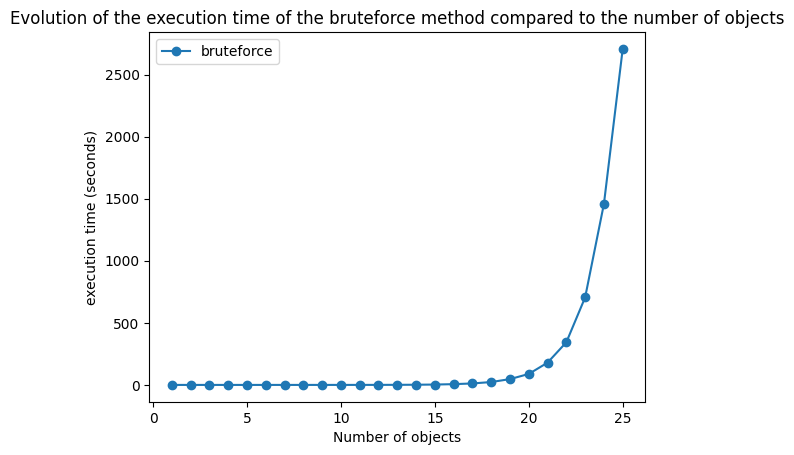

In [5]:
nb_items = [i for i in range(1, 26)]
execution_time = [
    0.0004394054412841797, 
    0.0006959438323974609, 
    0.0011038780212402344, 
    0.0018851757049560547, 
    0.0032958984375,
    0.006640911102294922,
    0.012192010879516602,
    0.02356100082397461,
    0.0535430908203125,
    0.09524297714233398,
    0.1894087791442871,
    0.35834217071533203,
    0.7466366291046143,
    1.5333445072174072,
    3.010648250579834,
    6.199965476989746,
    11.846551895141602,
    23.217730283737183,
    46.79757475852966,
    88.38219118118286,
    179.35672903060913,
    343.6416959762573,
    704.8867721557617,
    1457.7425210475922,
    2706.6401579380035
]

plt.plot(nb_items, execution_time, 'o-', label='bruteforce')
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title('Evolution of the execution time of the bruteforce method compared to the number of objects')
plt.show()

We notice that the duration of the bruteforce method evolves in an exponential way.

Graphic representation of the pymoo's method :

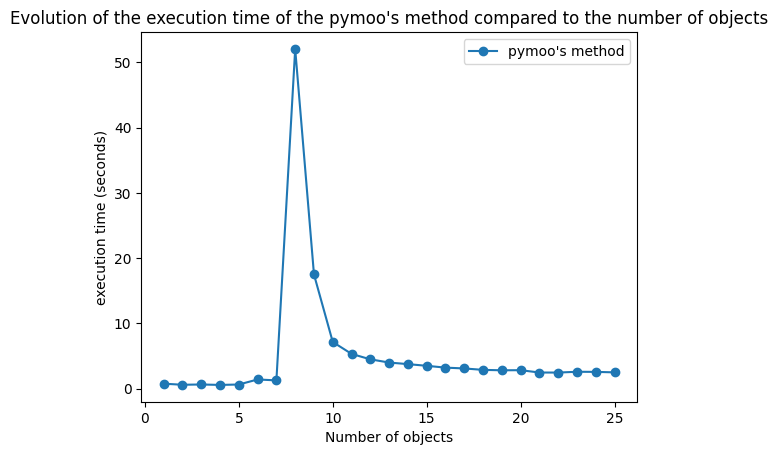

In [6]:
nb_items = [i for i in range(1, 26)]
execution_time = [0.7720391750335693, 
                  0.6049449443817139, 
                  0.6484730243682861, 
                  0.5807454586029053, 
                  0.6437427997589111, 
                  1.416168212890625, 
                  1.2756850719451904, 
                  52.04385018348694, 
                  17.50101923942566, 
                  7.156890153884888, 
                  5.333650827407837, 
                  4.498365640640259, 
                  4.008447885513306, 
                  3.767069101333618, 
                  3.507680892944336, 
                  3.2297239303588867, 
                  3.1035640239715576, 
                  2.886528968811035, 
                  2.821547031402588, 
                  2.837764263153076, 
                  2.480355978012085, 
                  2.4743576049804688, 
                  2.5951144695281982, 
                  2.5779268741607666, 
                  2.504819869995117]

plt.plot(nb_items, execution_time, 'o-', label="pymoo's method")
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title("Evolution of the execution time of the pymoo's method compared to the number of objects")
plt.show()

The evolution of the execution time of the pymoo method cannot be compared to any common function. It can be noticed that except in some cases, the program always takes more or less the same time to execute.

Graphic representation of the greedy method :

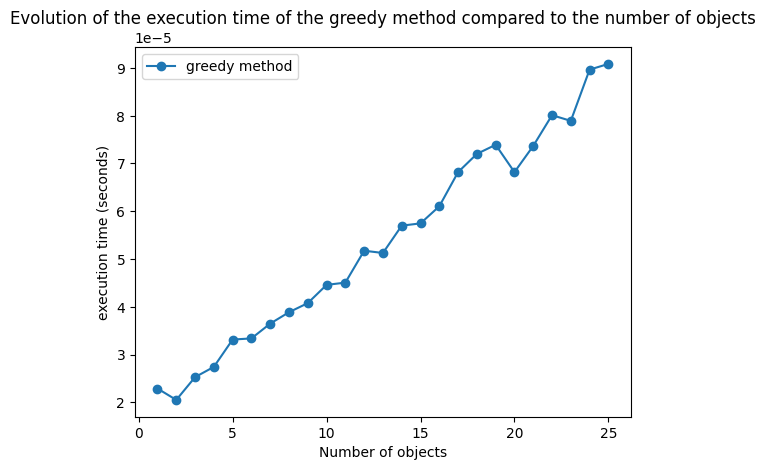

In [7]:
nb_items = [i for i in range(1, 26)]
execution_time = [2.288818359375e-05, 
                  2.0503997802734375e-05, 
                  2.5272369384765625e-05, 
                  2.7418136596679688e-05, 
                  3.314018249511719e-05, 
                  3.337860107421875e-05, 
                  3.647804260253906e-05, 
                  3.886222839355469e-05, 
                  4.076957702636719e-05, 
                  4.458427429199219e-05, 
                  4.506111145019531e-05, 
                  5.173683166503906e-05, 
                  5.125999450683594e-05, 
                  5.698204040527344e-05, 
                  5.745887756347656e-05, 
                  6.103515625e-05, 
                  6.818771362304688e-05, 
                  7.200241088867188e-05, 
                  7.390975952148438e-05, 
                  6.818771362304688e-05, 
                  7.367134094238281e-05, 
                  8.0108642578125e-05, 
                  7.891654968261719e-05, 
                  8.96453857421875e-05, 
                  9.083747863769531e-05]

plt.plot(nb_items, execution_time, 'o-', label="greedy method")
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title("Evolution of the execution time of the greedy method compared to the number of objects")
plt.show()

We can then notice that the execution time of the gluttonous method increases with the number of objects.